In [4]:
import numpy as np        
#A library for working with arrays and mathematical functions
import pandas as pd  
#A library for data manipulation and analysis, providing data structures like DataFrames and Series.
import matplotlib.pyplot as plt  
#A plotting library for creating static, interactive, and animated visualizations.
import seaborn as sb 
#A statistical data visualization library based on Matplotlib
from sklearn.model_selection import train_test_split  
#A module for splitting data into training and testing sets.
from sklearn.preprocessing import LabelEncoder, StandardScaler  
#A module for preprocessing data, including label encoding and scaling.
from sklearn import metrics   
#A module for evaluating machine learning models
from sklearn.svm import SVC     
#A module for Support Vector Machines (SVM) classification.
from xgboost import XGBClassifier  
#A library for gradient boosting algorithm , also training multiple weak models to produce strong prediction
from sklearn.linear_model import LogisticRegression     
#A module for linear models, including Logistic Regression.
from imblearn.over_sampling import RandomOverSampler   
#A module for handling imbalanced datasets.
import warnings
warnings.filterwarnings('ignore')
#it is used to ignore any warning messages that might be generated during the execution of the code.

In [5]:
df = pd.read_csv('Autism-Prediction-using-Machine-Learning---DataSet.csv')  
#pd.read_csv() function is used to read the CSV file, and the resulting DataFrame is stored in the df variable.
df.head()
#line is used to display the first five rows of the DataFrame

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,0,1,...,m,White-European,yes,no,India,no,12.399055,18 and more,Self,0
1,2,1,0,0,0,0,0,0,1,0,...,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self,0
2,3,1,1,1,0,1,1,0,1,1,...,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.220766,18 and more,Self,0
4,5,0,0,0,1,0,0,0,0,0,...,m,?,no,no,Italy,no,7.252028,18 and more,Self,0


In [6]:
df.shape
# number of rows and columns in the DataFrame. Specifically, it returns a tuple of the form (number_of_rows, number_of_columns).

(200, 22)

In [7]:
df.info()
#method of a Pandas DataFrame provides information about the DataFrame, including the data types of each column, the number of non-null values, and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [8]:
df.describe().T
#generates descriptive statistics for numeric columns 

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


In [9]:
#-----------------------------cleaning of data-------------------------------------------
df['ethnicity'].value_counts()
#return a Series that displays the frequency count of each unique value in the ethnicity column of the DataFrame df, sorted in descending order.

ethnicity
White-European     66
?                  54
Middle Eastern     27
Asian              17
South Asian         9
Pasifika            8
Others              7
Latino              4
Turkish             3
Black               3
Hispanic            2
Name: count, dtype: int64

In [10]:
df['relation'].value_counts()
# displays the frequency count of each unique value in the relation column of the DataFrame df, sorted in descending order.

relation
Self                        180
Parent                        8
?                             6
Relative                      2
Others                        2
Health care professional      2
Name: count, dtype: int64

In [11]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


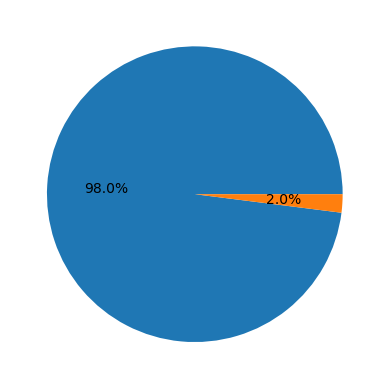

In [12]:
#-----------------------------Exploratory data analysis--------------------------
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [13]:
ints = []
objects = []
floats = [] # creating 3 empty lists,it iterates over each column in the dataframe

for col in df.columns:
  if df[col].dtype == int: # checks datatype of column
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


In [14]:
#ints.remove('ID')
#ints.remove('Class/ASD')
ints = df.select_dtypes(include=['int64']).columns   #it selects all columns in the dataframe
ints = ints.tolist()   #It converts the resulting Series (which contains the column names) to a list using the tolist() method.
ints.remove('Class/ASD')       #It removes the Class/ASD column from the list of integer columns using the remove() method.
ints = pd.Index(ints)

#It converts the resulting list back to a Pandas Index object using the pd.Index() constructor.

In [15]:
ints

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice',
       'austim', 'used_app_before'],
      dtype='object')

In [16]:
ints = df.select_dtypes(include=['int64']).columns     #select_dtypes is a Pandas method that returns a subset of columns based on their data types.
if 'ID' in ints:
    ints = ints.difference(['ID'])    #the difference method is used to remove 'ID' from the ints list
ints = ints.difference(['Class/ASD'])

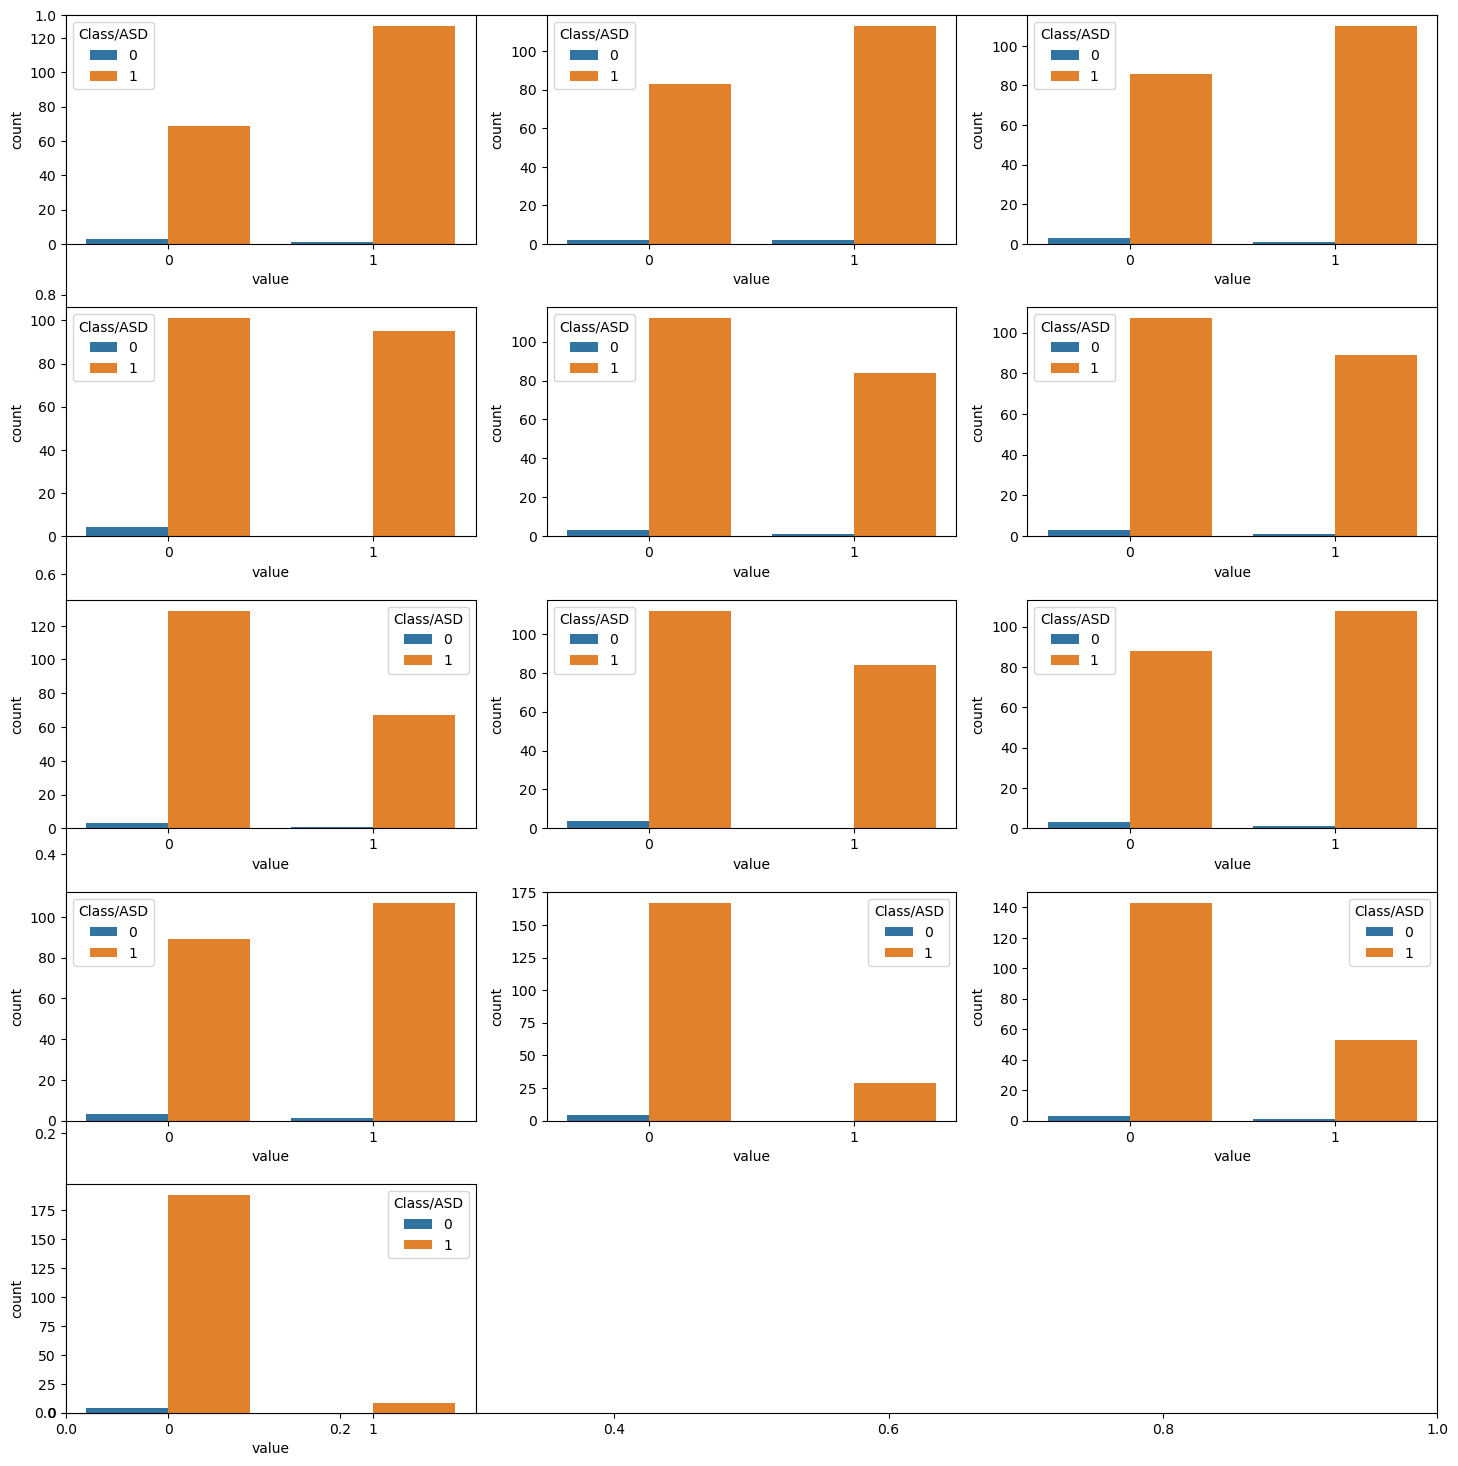

In [17]:
# Convert the data to long-form using melt
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')
# melt method is used to  transforming columns into rows.
#var_name='col' and value_name='value' specify the names of the new columns created by the melt operation.
#The resulting melted DataFrame is stored in the df_melted variable.
plt.subplots(figsize=(15,15))
#subplots is a function that creates a figure and a set of subplots (individual plots) within that figure.
for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  # Use the melted DataFrame and specify x and hue
  sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col])

plt.tight_layout()
#This function is used to adjust the layout of the subplots so that they fit nicely within the figure area.
plt.show()
#This function is used to display the plot.

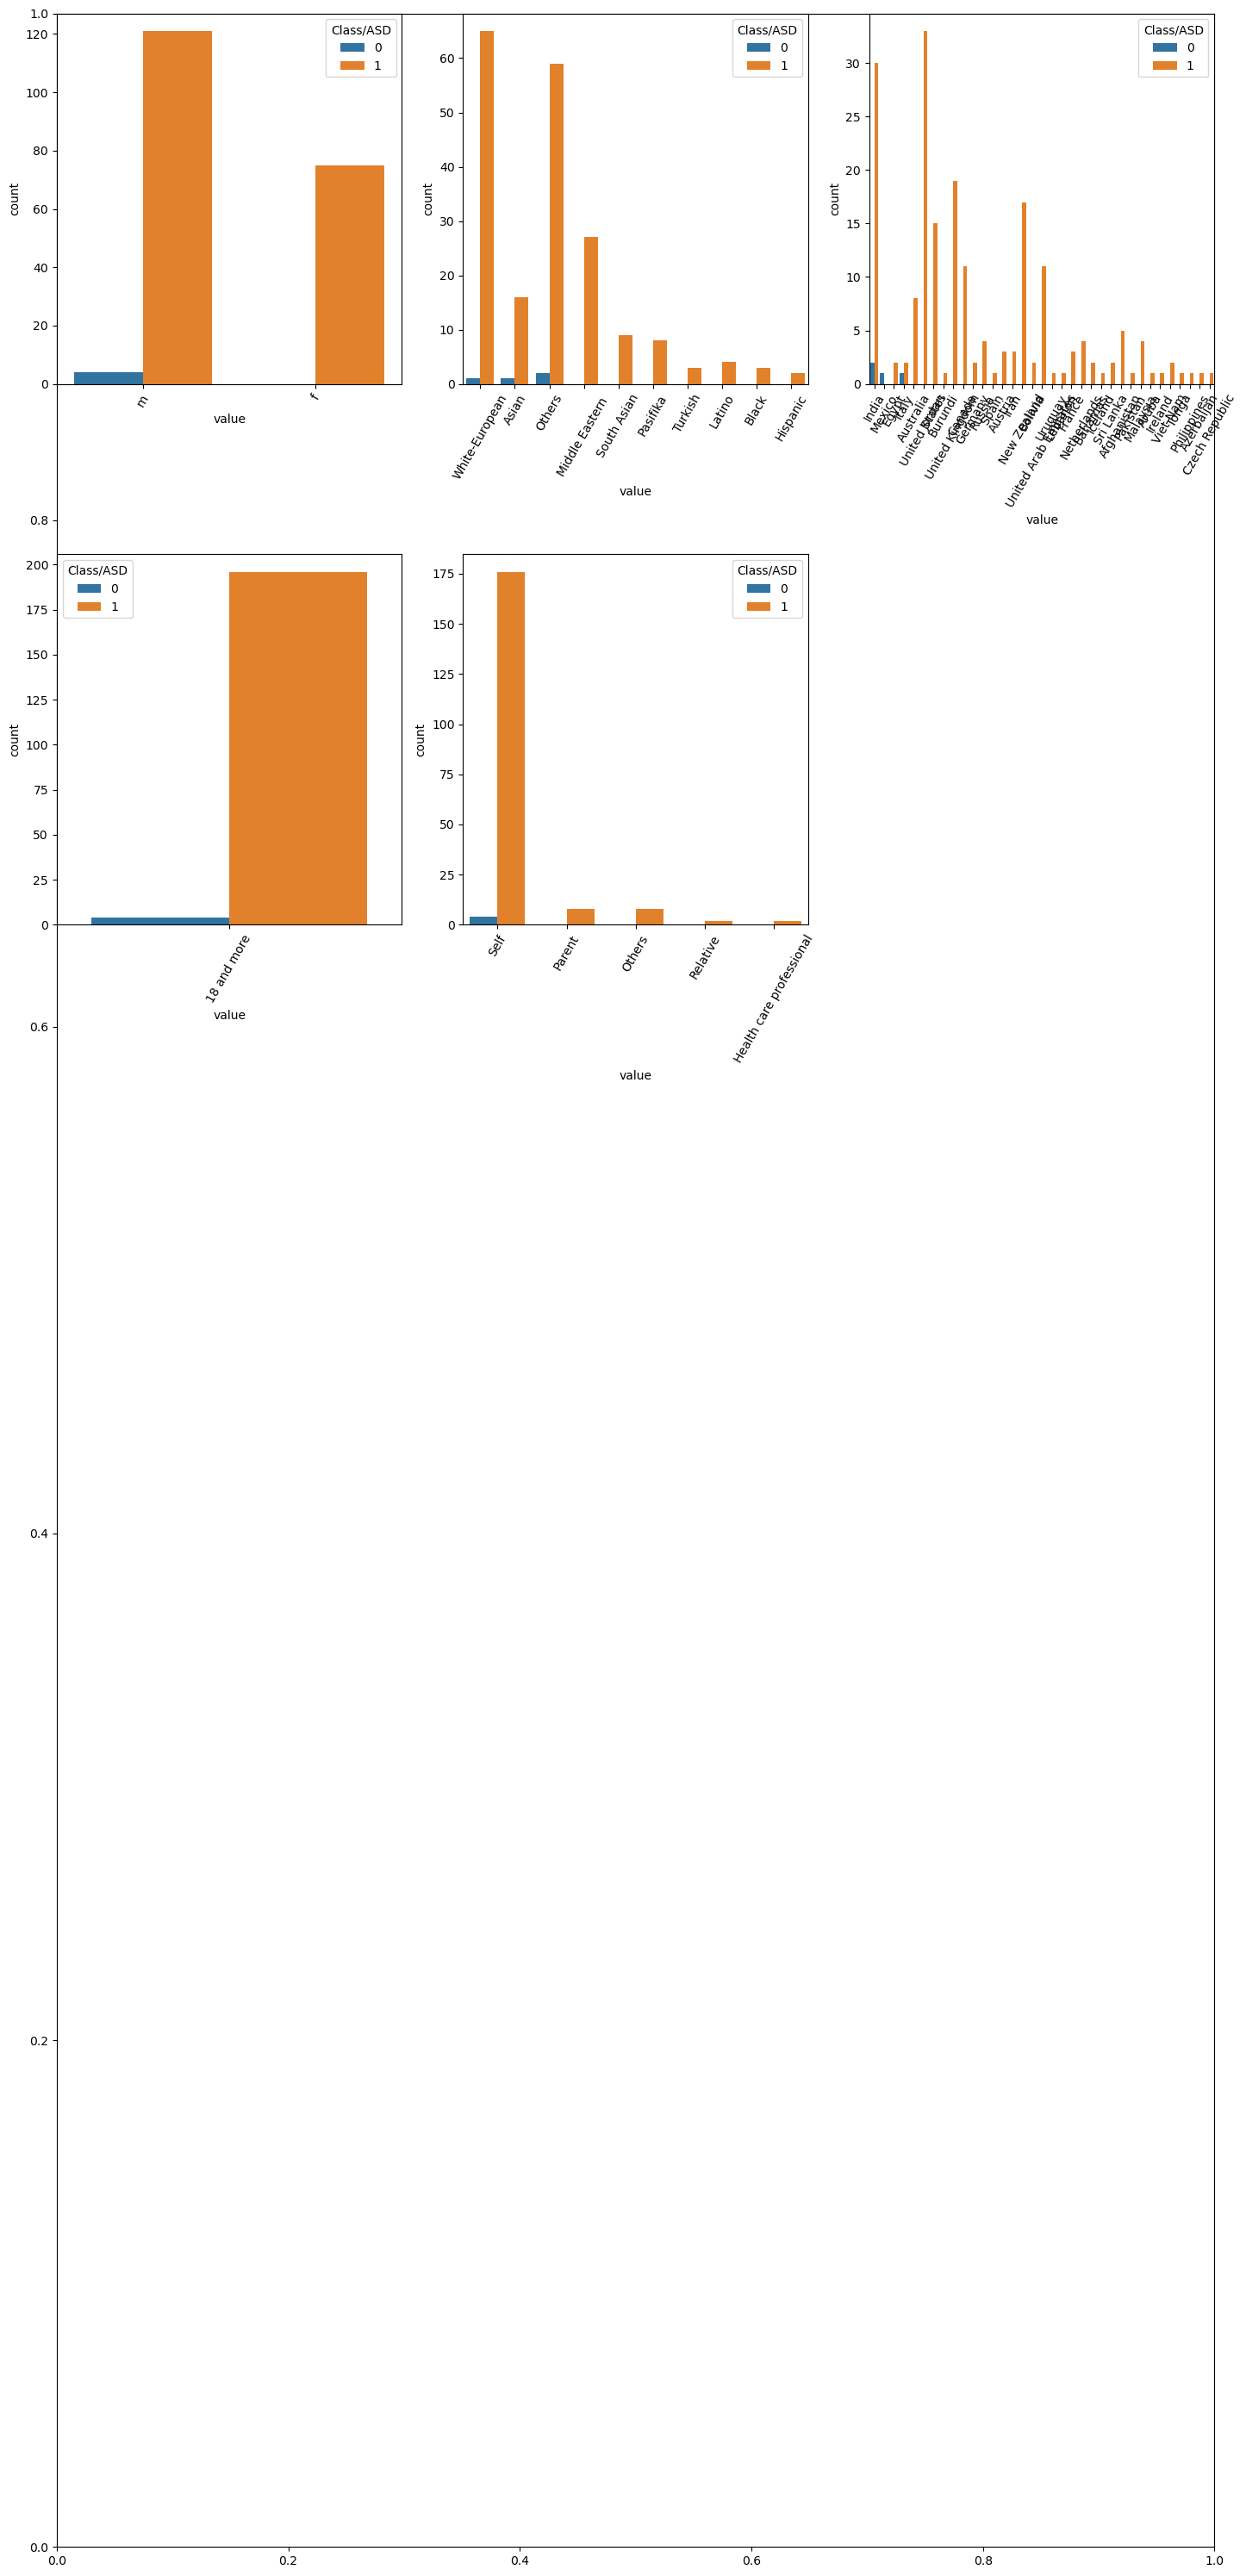

In [18]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['Class/ASD'], value_vars=[col], var_name='col', value_name='value')

    # Use the melted DataFrame and specify x and hue
    sb.countplot(x='value', hue='Class/ASD', data=df_melted)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

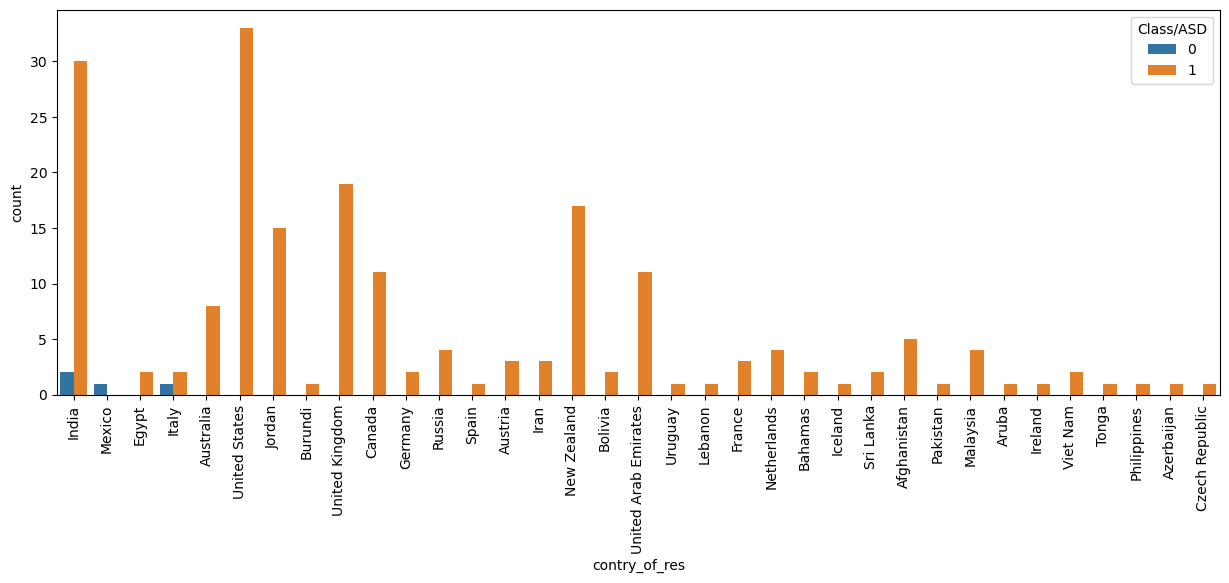

In [19]:
plt.figure(figsize=(15,5))   #This line creates a new figure with a specified size of 15 inches wide and 5 inches high  and to set to accommodate the potentially long country names on the x-axis.
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD') #sets the x-axis variable to the country of residence and , creating separate bars for each group.
plt.xticks(rotation=90)
#This line rotates the x-axis labels by 90 degrees, making them easier to read, especially if the country names are long.
plt.show()






#based on the place or country , their is an effect of Autism

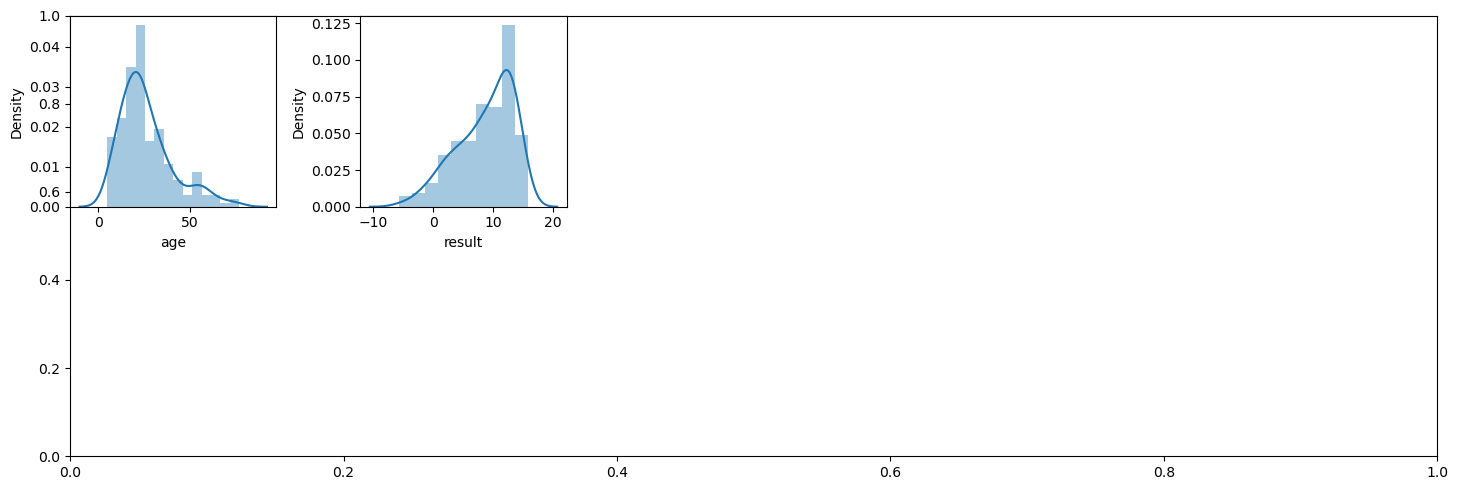

In [22]:
#plt.subplots(figsize=(15,5))

#for i, col in enumerate(floats):
 # plt.subplot(1,2,i+1)
  #sb.distplot(df[col])
#plt.tight_layout()
#plt.show()
floats = [col for col in df.columns if df[col].dtype == 'float64' and col != 'age_desc']   #creates a list of column names that have a float64 data type
plt.subplots(figsize=(15,5))
for i, col in enumerate(floats):    #enumerate function returns both the index i and the value col of each item in the list.  
  plt.subplot(2, 5, i+1)
  sb.distplot(df[col])     # a distribution plot for the current column using seaborn's distplot function.
plt.tight_layout()

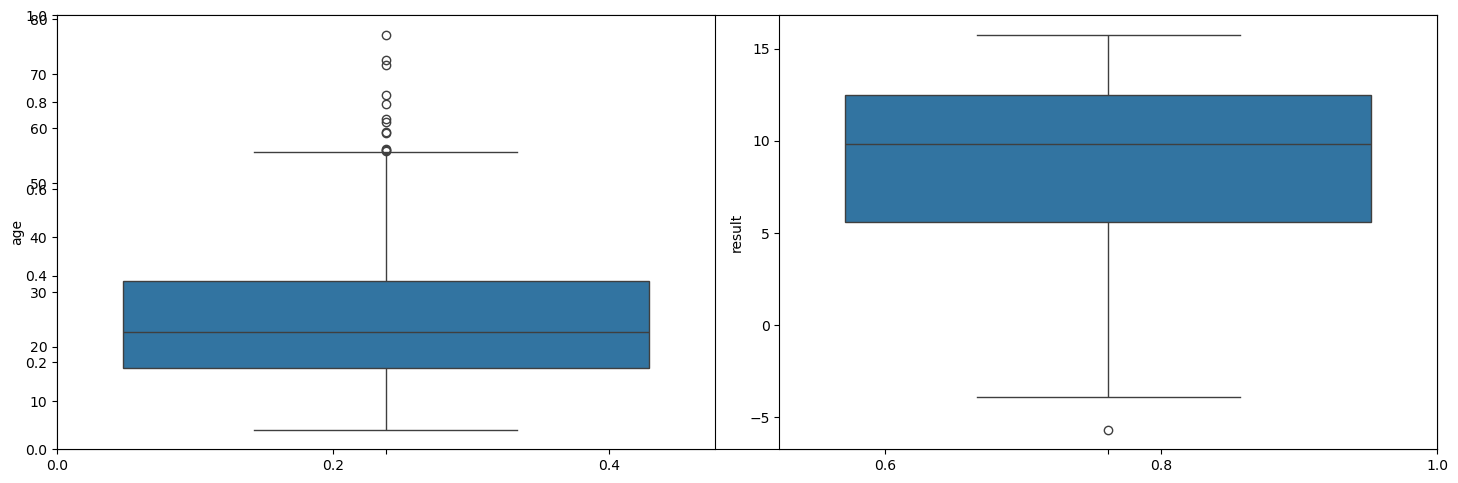

In [23]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])    #boxplot function automatically calculates the quartiles and outliers for each column and creates the plot.
plt.tight_layout()
plt.show()





#we need to check if their is any outliers 
#example= we have several datapoints among them if we found any different datapoint this may result in decrease of Accuracy

In [24]:
df = df[df['result']>-5]
df.shape




#here we found 1 outlier 

(199, 22)

In [25]:
#--------------------------------Features-------------------------------------------
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'     #0-3 years old
    elif age < 12:         
        return 'Kid'    #4-11 years old
    elif age < 18:
        return 'Teenager'  #12-17 years old
    elif age < 40:
        return 'Young'   # 18-39 years old
    else:
        return 'Senior'   #40 years old and above

df['ageGroup'] = df['age'].apply(convertAge)


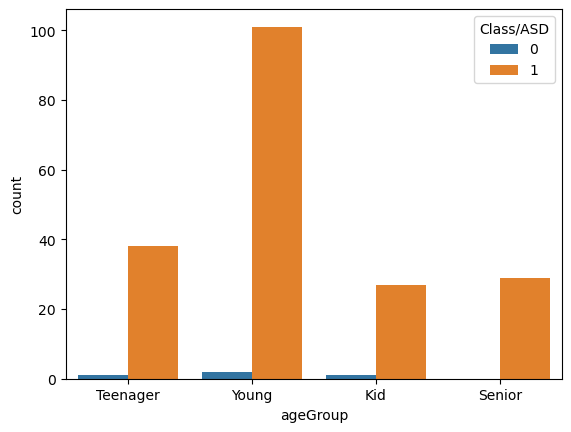

In [26]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD']) #creates a count plot using seaborn's countplot function.
plt.show()


In [27]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


# higher the sum ,higher the Autism


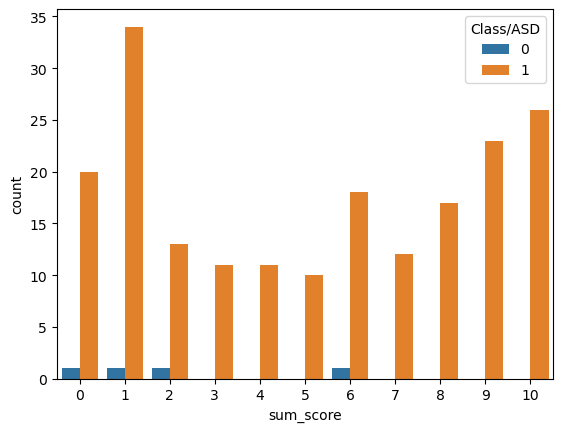

In [28]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [29]:
# Applying log transformations to remove the skewness(unwanted parameters) of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


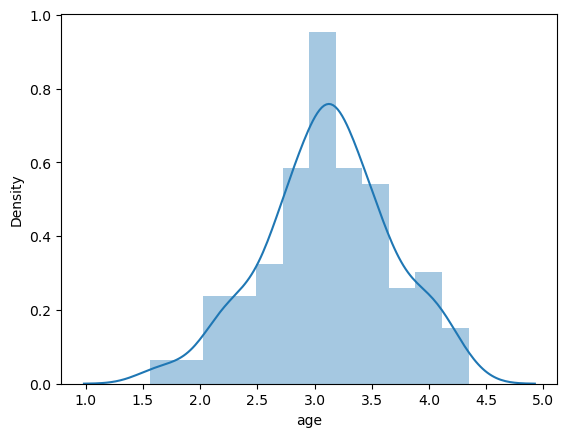

In [30]:
sb.distplot(df['age'])
plt.show()


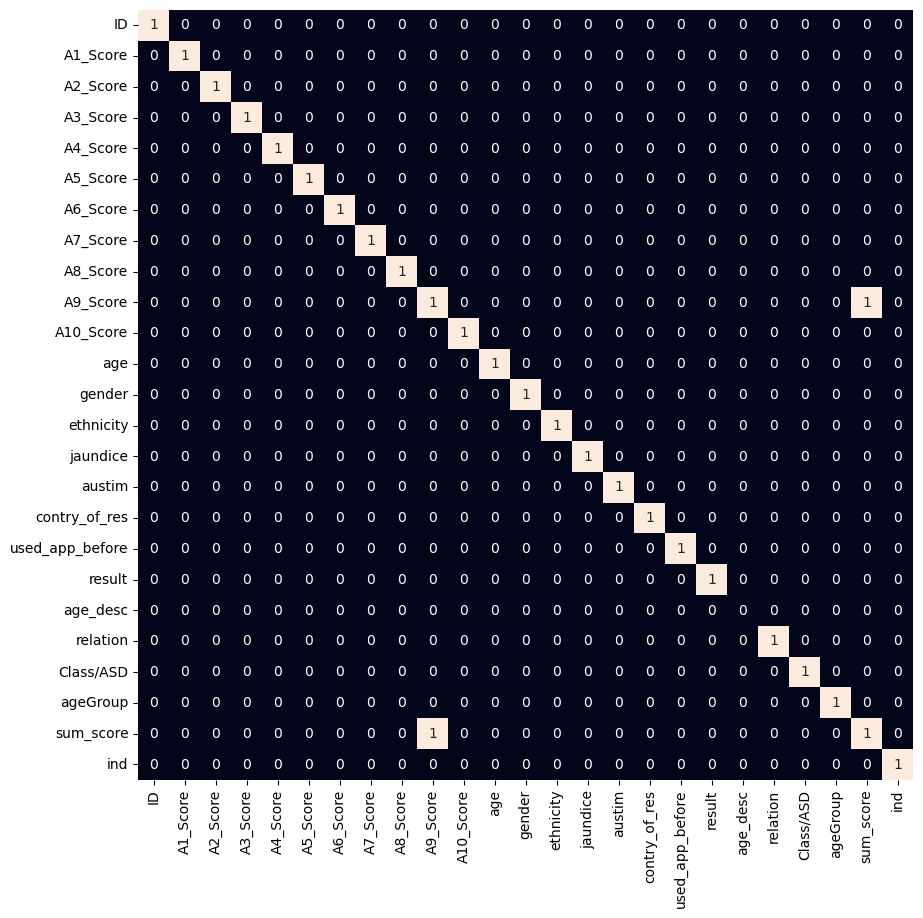

In [31]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [32]:
#--------------------MODEL TRAINING---------------------------------
#separating the features and target variables and split them in to training and testing data
removal = ['ID', 'age_desc', 'used_app_before', 'austim']  #column names that should be removed from the DataFrame.
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)
#20% for testing and 80% for the training

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class i.e RandomOversamplier
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((312, 20), (312,))

In [34]:
# Normalizing the features for stable and fast training.
#every datpoint  should have equal range so,
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [35]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]    #radial basis function ,to find the optimal hyperplane
#an extreme gradient boosting classifier model-XGBClassifier. 
#SVC(kernel='rbf'): a support vector classifier model with a radial basis function (RBF) kernel
for model in models:
  model.fit(X, Y)  #trains the current model on the training data X and Y.
  print(f'{model} : ')   #prints the name of the current model.
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    # Reciever Operating Characteristc Curve (ROC AUC) to evaluate the performance of binary classification
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.9775641025641026
Validation Accuracy :  0.44871794871794873

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.47435897435897434

SVC() : 
Training Accuracy :  0.9903846153846154
Validation Ac

In [ ]:
#training accuracy  high with low validation accuracy  result in overfitting

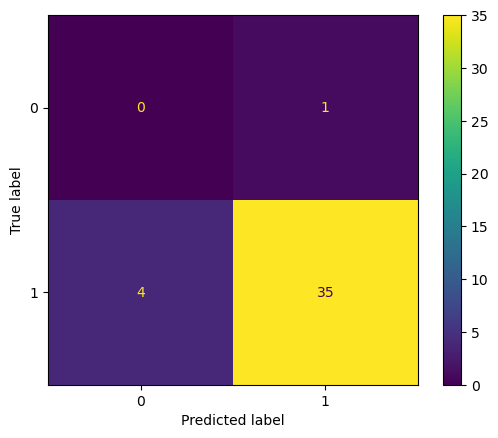

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
#creates a ConfusionMatrixDisplay object from the first model in the models list (models[0]) using the validation data X_val and Y_val.
plt.show()

In [ ]:
#FN=1
#TN=35
#TP=4
#FP=0
#Accuracy=(TP+TN)/(TP+TN+FP+FN)
